In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
'''
Have a system consisting of the Sun, Earth, Mars and a probe near Earth. The probe has initial conditions as specified.
Define a 'cost funciton' chi: root((r-x)^2) where r is the distance from the probe to Mars, and x the probe's x position.
Study the impact of slightly varying the probe's vx on the cost.

Have Chi(vx) = Chi(vx_0) + (vx-vx_0)dChi/dvx + 1/2 * (vx-vx_0)^2 * d^2Chi/dvx^2

dChi/dvx = dChi/dx * dx/dvx
dChi/dx = (x-r)/root((r-x)^2)
get dx/dvx from variation
'''

def calculate_xpos(vx):
    sim = rebound.Simulation()
    sim.add(m=1)   # add the Sun
    ''' CANNOT USE CARTESIAN DATA, NEED TO USE ORBITAL ELEMENTS
    # add Earth as of Feb 13 2017, 00:00:00
    sim.add(m=2.95e-6, x=-7.978572823262211E-01, y= 5.812732071419280E-01, z=-1.722649673541333E-04,\
            vx=-1.033661818510841E-02, vy=-1.401082240323706E-02, vz=7.127882424861757E-10)   
    # add Mars as of Feb 13 2017, 00:00:00
    sim.add(m=3.21e-7, x=1.093396336138831, y=9.655017747507859E-01, z=-6.763596943826665E-03,\
            vx=-8.725401522523147E-03, vy=1.169825170487331E-02, vz=4.591341975755195E-04)  
    '''
    sim.add(m=2.95e-6, x=-7.978572823262211E-01, y= 5.812732071419280E-01, \
            z=-1.722649673541333E-04, vx=-1.033661818510841E-02, vy=-1.401082240323706E-02, vz=7.127882424861757E-10) 
    sim.add(m=3.21e-7, x=1.093396336138831, y=9.655017747507859E-01, z=-6.763596943826665E-03,\
            vx=-8.725401522523147E-03, vy=1.169825170487331E-02, vz=4.591341975755195E-04)
    # Now add a small probe near to Earth.
    sim.add(m=1e-28, x=-8.0E-01, y= 6.0E-01, z=-2.0E-04, vx=vx, \
            vy=-1.401082240323706E-02, vz=7.127882424861757E-10)
    ps = sim.particles
    sim.integrate(2*np.pi*1) # integrate for 1 Earth year
    return [ps[3].x, ps[3].y, ps[3].z, ps[2].x, ps[2].y, ps[2].z] # get positions back

print "Probe with vx=-1.0E-02 gives probe position: {}\n\t\t\t Mars position: {}".format(calculate_xpos(vx=-1.0E-02)[0:3],\
                                                                                  calculate_xpos(vx=-1.0E-02)[3:])


print "Probe with vx=-1.5E-02 gives probe position: {}\n\t\t\t Mars position: {}".format(calculate_xpos(vx=-1.5E-02)[0:3],\
                                                                                  calculate_xpos(vx=-1.5E-02)[3:])








Probe with vx=-1.0E-02 gives probe position: [-0.7228955843119583, 0.5554849004594129, -0.00018836706704681964]
			 Mars position: [0.6032457157004847, 0.5086035555079818, -0.004234056285918552]
Probe with vx=-1.5E-02 gives probe position: [-0.7230032598441998, 0.5565225266419809, -0.00018866650107948998]
			 Mars position: [0.6032457156992477, 0.5086035555068789, -0.004234056285911121]


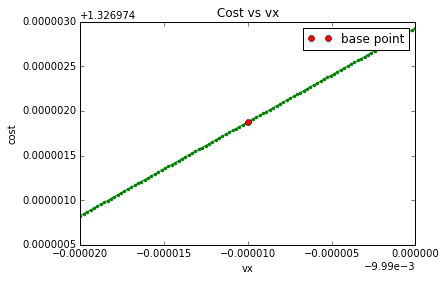

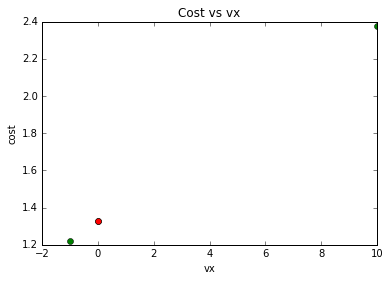

In [5]:
'''
Have a system consisting of the Sun, Earth, Mars and a probe near Earth. The probe has initial conditions as specified.
Define a 'cost funciton' chi: root((r-x)^2) where r is the position of Mars, and x the probe's x position.
Study the impact of slightly varying the probe's vx on the cost.

Have Chi(vx) = Chi(vx_0) + (vx-vx_0)dChi/dvx + 1/2 * (vx-vx_0)^2 * d^2Chi/dvx^2

dChi/dvx = dChi/dx * dx/dvx
dChi/dx = (x-r)/root((r-x)^2)

d^2Chi/dvx^2 = d^2Chi/dx^2 * d^x/dvx^2
d^2Chi/dx^2 = 0 --> can ignore this term!
get dx/dvx from variation
'''
def cost(r, x):
    '''r, x are 3-component arrays, r being the position of Mars, and x being the position of the probe'''
    cost = np.sum(np.square(r-x))
    return np.sqrt(cost)

def dcost_dx(r, x):
    '''r, x are 3-component arrays, r being the position of Mars, and x being the position of the probe'''
    dcost = np.sum((x-r)/np.sqrt(np.square(r-x)))
    return dcost


def calculate_xpos_deriv(vx_0):
    sim = rebound.Simulation()
    sim.add(m=1)   # add the Sun
    sim.add(m=2.95e-6, x=-7.978572823262211E-01, y= 5.812732071419280E-01, \
            z=-1.722649673541333E-04, vx=-1.033661818510841E-02, vy=-1.401082240323706E-02, vz=7.127882424861757E-10) 
    sim.add(m=3.21e-7, x=1.093396336138831, y=9.655017747507859E-01, z=-6.763596943826665E-03,\
            vx=-8.725401522523147E-03, vy=1.169825170487331E-02, vz=4.591341975755195E-04)
    # Now add a small probe near to Earth.
    sim.add(m=1e-28, x=-8.0E-01, y= 6.0E-01, z=-2.0E-04, vx=vx_0, \
            vy=-1.401082240323706E-02, vz=7.127882424861757E-10)
    v1 = sim.add_variation() # add a set of variational particles
    v1.particles[3].vx = 1 
    v2 = sim.add_variation(order=2, first_order=v1)
    v2.particles[3].vx = 1
    sim.integrate(2*np.pi*1) # integrate for 1 Earth year
    return [sim.particles[3].x, sim.particles[3].y, sim.particles[3].z, sim.particles[2].x, sim.particles[2].y, \
            sim.particles[2].z], v1.particles[3].x, v2.particles[3] # get positions back, and x derivatives

vx_0 = -1.0E-02
pos, dxpos, d2xpos = calculate_xpos_deriv(vx_0) # get position vectors for probe, Mars, and vx for probe.
r = np.array(pos[3:]) # position of MARS
pos = np.array(pos[:3]) # position of PROBE
cost_base = cost(r,pos)
# unfortunately the cost fn. has a second deriv wrt x of 0 ==> can only expand to first order in variation
'''
Now that we have the base cost of the trip, lets vary vx_0 slightly
'''
# set up array of v's close by vx_0
vx = np.linspace(-0.5E-2, -1.5E-2, 50) 
vx2 = np.linspace(vx_0-0.001*vx_0, vx_0+0.001*vx_0, 100) 
# lets create an array of things we know won't work, ie where vx is not close to vx_0
vx_bad = [vx_0+10., vx_0-1., vx_0+2*10E-10] # deltas too big or too small


varied_costs = []
for vel in vx:
    varied_costs.append(cost_base + (vel-vx_0)* (dcost_dx(r,pos) * dxpos))
    
varied_costs2 = []
for vel in vx2:
    varied_costs2.append(cost_base + (vel-vx_0)* (dcost_dx(r,pos) * dxpos))

varied_costs3 = []
for vel in vx_bad:
    varied_costs3.append(cost_base + (vel-vx_0)* (dcost_dx(r,pos) * dxpos))

#plt.plot(vx, varied_costs, '.-b')
plt.figure(1)
plt.plot(vx2, varied_costs2, '.-g')
plt.plot(vx_0, cost_base, 'or', label='base point')
plt.xlabel('vx')
plt.ylabel('cost')
plt.title('Cost vs vx')
plt.legend()
plt.figure(2)
plt.plot(vx_bad, varied_costs3, 'og')
plt.plot(vx_0, cost_base, 'or', label='base point')
plt.xlabel('vx')
plt.ylabel('cost')
plt.title('Cost vs vx')


plt.show()


